dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


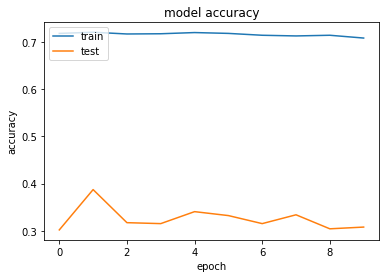

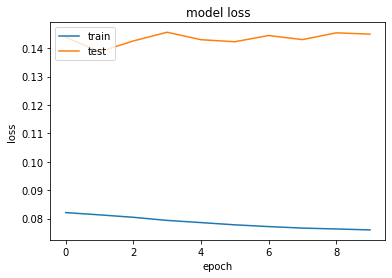

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**Making predictions on Test data set**

In [ ]:
test_dataset.reset()
predictions=model.predict_generator(test_dataset,
steps=STEP_SIZE_TEST,
verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


1379/1379 [==============================] - 40s 29ms/step


##**Saving the predictions in a viewable format**

In [ ]:
pred_data = predictions[columns].apply(lambda x: x > 0)
result['labelId'] = pred_data.apply(lambda x: list(columns[x.values]), axis=1)

In [ ]:
predictions.shape

(6895, 228)

In [ ]:
pred_bool = (predictions >0.3)

In [ ]:
pred = pred_bool.astype(int)

#columns should be the same order of y_col
pred_results=pd.DataFrame(pred, columns=columns)

#Preparing the dataframe with imageid and their respective predicted columns
pred_results["imageId"]=test_dataset.filenames
ordered_cols=columns.insert(0,'imageId')
pred_results=results[ordered_cols]

In [ ]:
pred_results

,imageId,u'95',u'66',u'137',u'70',u'20',u'36',u'44',u'214',u'105',u'133',u'170',u'97',u'153',u'138',u'18',u'164',u'189',u'176',u'74',u'181',u'171',u'190',u'106',u'53',u'184',u'114',u'222',u'113',u'87',u'17',u'98',u'49',u'110',u'218',u'91',u'59',u'151',u'225',u'79',...,u'24',u'197',u'182',u'139',u'23',u'125',u'207',u'29',u'85',u'34',u'208',u'221',u'172',u'202',u'199',u'179',u'58',u'219',u'198',u'161',u'157',u'223',u'146',u'124',u'84',u'129',u'104',u'162',u'191',u'174',u'108',u'107',u'46',u'41',u'16',u'94',u'145',u'194',u'156',u'163'
0,test/3001.jpg,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,test/3002.jpg,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,test/3003.jpg,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,test/3004.jpg,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,test/3005.jpg,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,test/9893.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6891,test/9894.jpg,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6892,test/9895.jpg,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6893,test/9896.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##**Assing list of cells with value = 1 to the respective imageId**

In [ ]:
pred_data = pred_results[columns].apply(lambda x: x > 0)
result['predicted_labels'] = pred_data.apply(lambda x: list(columns[x.values]), axis=1)
result.head()

,imageId,predicted_labels
0,3001.jpg,"[u'66', u'105', u'153']"
1,3002.jpg,"[u'66', u'20', u'153', u'171', u'62']"
2,3003.jpg,"[u'66', u'105', u'153']"
3,3004.jpg,"[u'66', u'105', u'153', u'17']"
4,3005.jpg,"[u'66', u'105']"


In [ ]:
#Save the results to csv file
result.to_csv("/content/drive/MyDrive/results.csv",index=False)